# Using SBbadger to create benchmarking models

In [1]:
from SBbadger import generate
import os
import numpy as np
import tellurium as te
import teUtils as tu
import csv
import re
from tqdm import tqdm

In [31]:
NUMBER_OF_SPECIES = 10
NOISE_LEVEL = 10
DATA_OMISSION_CODE = 'A'

FOLDER_NAME = f'{NUMBER_OF_SPECIES}sp_{NOISE_LEVEL}n_{DATA_OMISSION_CODE}/'
GENERATED_MODEL_PATH = './models/test/'

In [22]:
FOLDER_NAME

'10sp_10n_A'

## Generating the networks

In [ ]:
generate.models(n_models=500, 
                n_species=NUMBER_OF_SPECIES,
                add_enzyme=True,
                rev_prob=1,
                rxn_prob=[0.5, 0.4, 0.05, 0.05],
                constants=True,
                source=[1, 'loguniform', 0.01, 1],
                sink=[1, 'loguniform', 0.01, 1],
                mass_violating_reactions=False,
                net_plots=True,
                unaffected_nodes = False,
                #mass_balanced=True
               )


## Filtering the synthetic models for "realisticness"

Here, we are making a list of sbml models that pass our checks for "realistic-ness", which are
- the magnitude of all floating species concentrations are under 100
- the magnitude of all reaction rates are under 100
- the magnitude of all flux control coefficients are under 10

Of course, these figures are arbitrary, but a good start for avoiding extremes, considering that there are only 75 species in this model. 

In [4]:
UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 10
LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 1e-3
REACTION_RATE_CUTOFF = 10
FCC_CUTOFF = 10

In [17]:
sbmlPath = GENERATED_MODEL_PATH + 'sbml/'
with open('passlist.txt', 'w') as f:  # Use file to refer to the file object
    for sbml in tqdm(os.listdir(sbmlPath)):
        try: 
            r = te.loads(sbmlPath + sbml)
            r.reset()
            r.conservedMoietyAnalysis = True
            r.simulate(0,1000000)
            ss = r.steadyState()
            
            if r.getNumIndFloatingSpecies() < 8:
                pass # print('FAIL:', sbml)
            elif np.all(np.absolute(r.getFloatingSpeciesConcentrations() < UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                if np.all(np.absolute(r.getFloatingSpeciesConcentrations() > LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                    if np.all(np.absolute(r.getReactionRates() < REACTION_RATE_CUTOFF)):
                        if np.all(np.absolute(r.getScaledFluxControlCoefficientMatrix()[0] < FCC_CUTOFF)):
                            #if np.all(np.absolute(r.getReactionRates() != 0)):
                            if len(r.getBoundarySpeciesIds()) == 2: 
                                f.write(re.split(r'[_|.]', sbml)[2]+'\n')
                                #f.write(sbml +'\n')
        except:
            pass# print('FAIL:', sbml)

100%|██████████| 500/500 [01:01<00:00,  8.13it/s]


## Moving the filter-approved files into a saved folder

In [30]:
import shutil
os.getcwd()
FOLDER_NAME

'10sp_10n_A'

In [28]:
folder_types = ['sbml', 'antimony', 'net_figs']

# create a new folder called FOLDER_NAME
os.mkdir('./' + FOLDER_NAME)

# create antimony, netfigs, sbml folders
for type in folder_types: 
    os.mkdir('./' + FOLDER_NAME + f'{type}')


In [36]:
# go into models/test/antimony, netfigs, sbml
# copy all the files listed in passlist to relevent folders in FOLDER_NAME
def copyPassed(passlist, folder_type, file_type, ext):
    passed = [f'test_{file_type}_'+N+f'.{ext}' for N in passlist]
    
    for p in passed: 
        sourcePath = GENERATED_MODEL_PATH + f'{folder_type}/' + p
        destPath = './'+ FOLDER_NAME + f'{folder_type}/'+ p
        shutil.copy(sourcePath, destPath)

with open("passlist.txt") as file:
    passlist = [line.rstrip() for line in file]
 
#copyPassed(passlist, 'sbml', 'sbml', 'sbml')
#copyPassed(passlist, 'antimony', 'ant', 'txt')
#copyPassed(passlist, 'net_figs', 'net_fig', 'png')

## Plotting the passlist

In [40]:
ssPath = './' + FOLDER_NAME + 'ss_figs/'
os.mkdir(ssPath)

saved plot to ./10sp_10n_A/ss_figs/ss_106.png


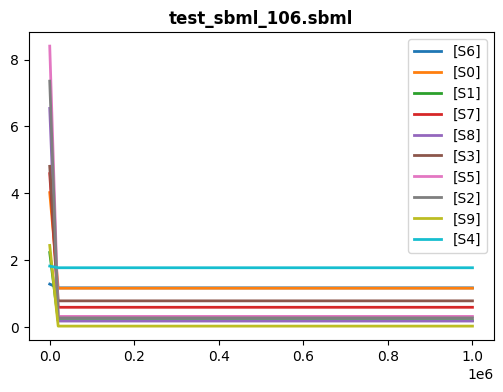

saved plot to ./10sp_10n_A/ss_figs/ss_129.png


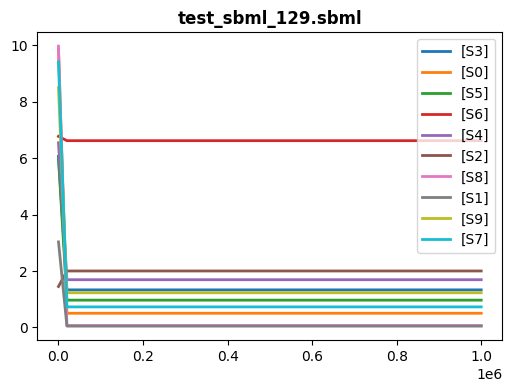

saved plot to ./10sp_10n_A/ss_figs/ss_147.png


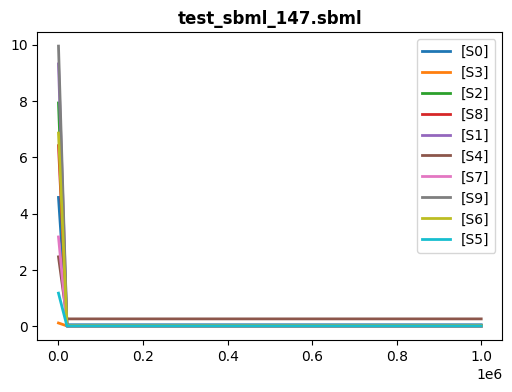

saved plot to ./10sp_10n_A/ss_figs/ss_160.png


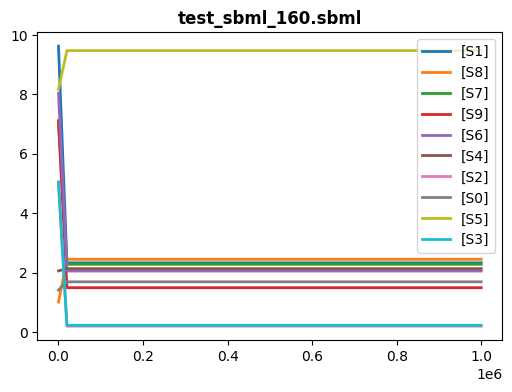

saved plot to ./10sp_10n_A/ss_figs/ss_240.png


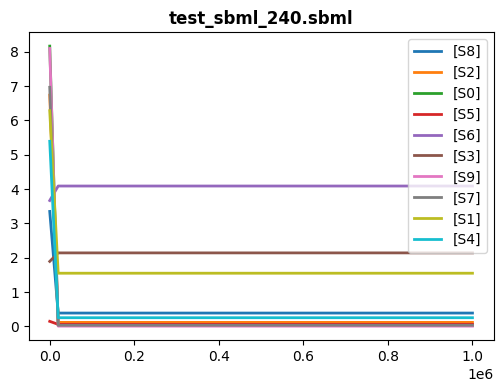

saved plot to ./10sp_10n_A/ss_figs/ss_242.png


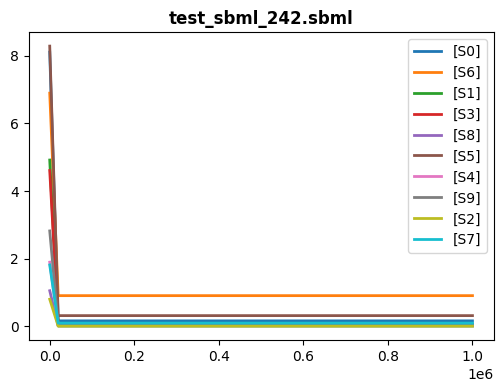

saved plot to ./10sp_10n_A/ss_figs/ss_243.png


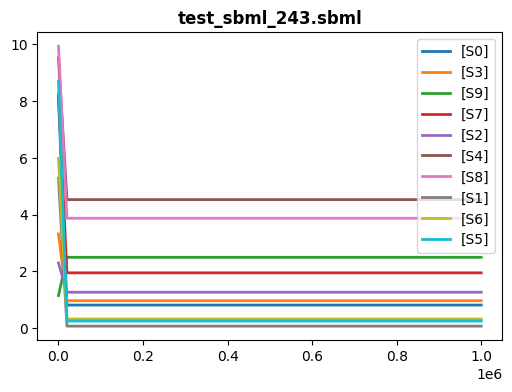

saved plot to ./10sp_10n_A/ss_figs/ss_265.png


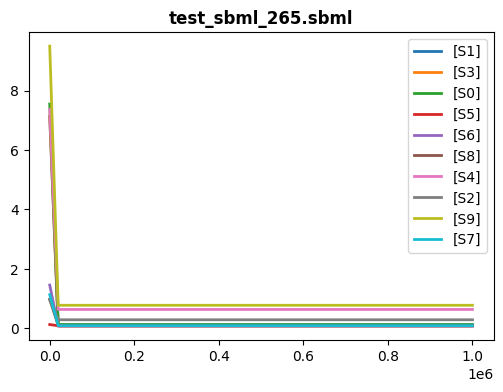

saved plot to ./10sp_10n_A/ss_figs/ss_268.png


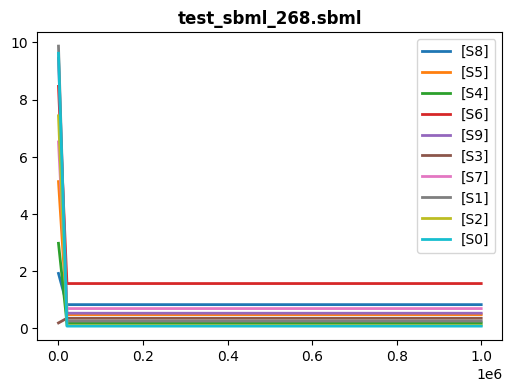

saved plot to ./10sp_10n_A/ss_figs/ss_281.png


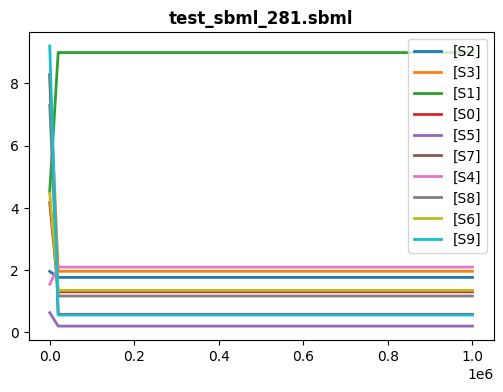

saved plot to ./10sp_10n_A/ss_figs/ss_294.png


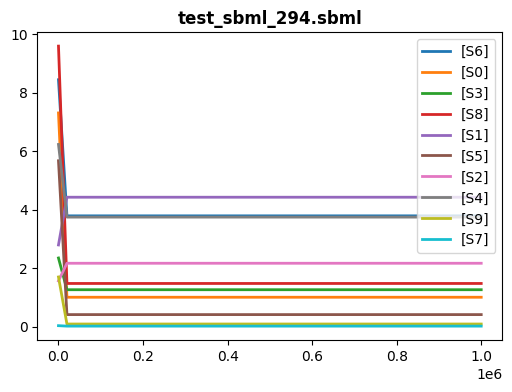

saved plot to ./10sp_10n_A/ss_figs/ss_31.png


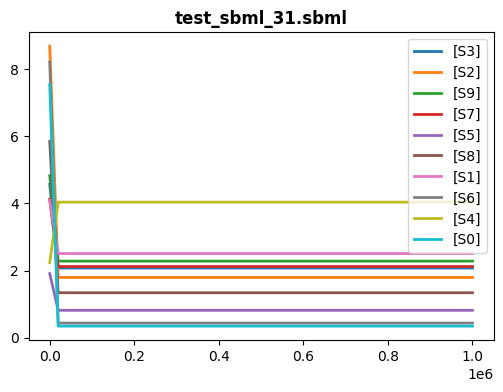

saved plot to ./10sp_10n_A/ss_figs/ss_319.png


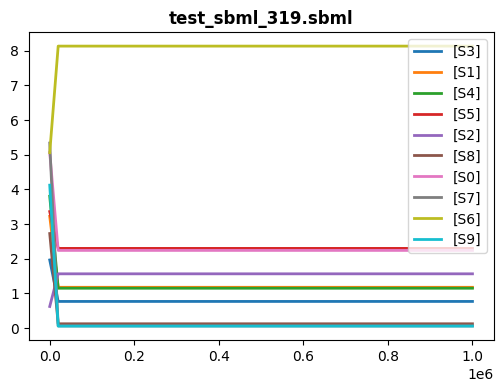

saved plot to ./10sp_10n_A/ss_figs/ss_323.png


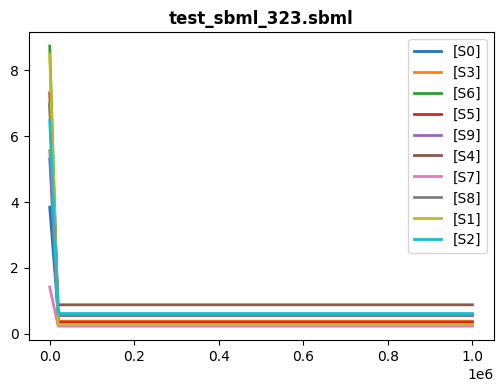

saved plot to ./10sp_10n_A/ss_figs/ss_343.png


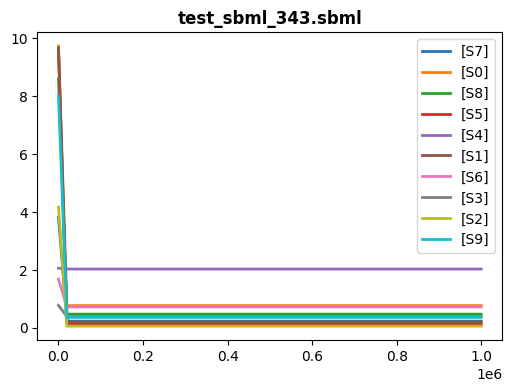

saved plot to ./10sp_10n_A/ss_figs/ss_365.png


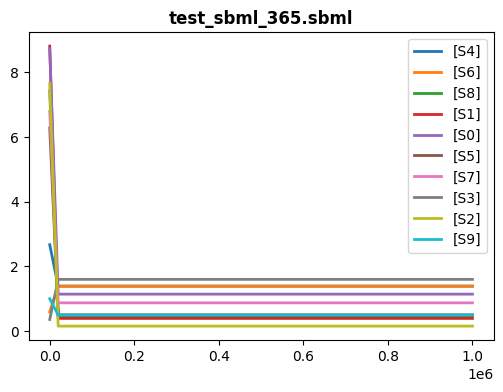

saved plot to ./10sp_10n_A/ss_figs/ss_370.png


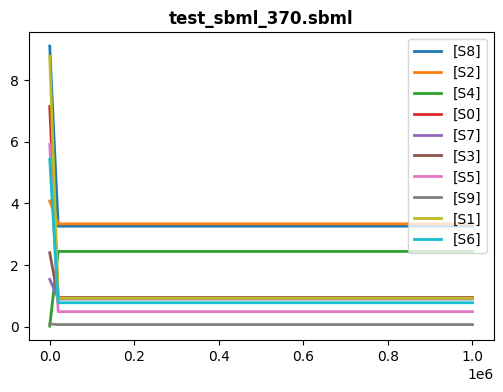

saved plot to ./10sp_10n_A/ss_figs/ss_375.png


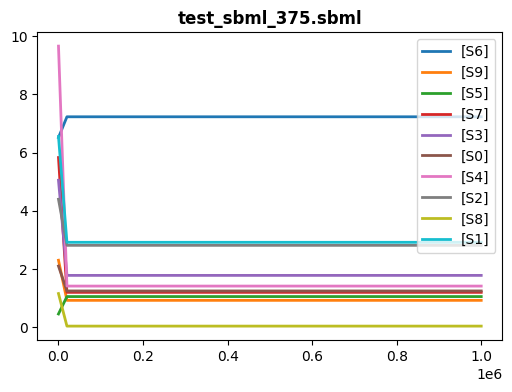

saved plot to ./10sp_10n_A/ss_figs/ss_378.png


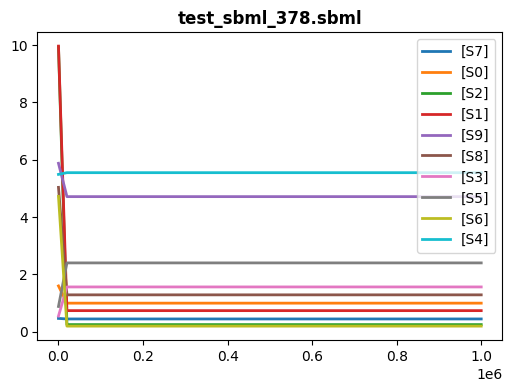

saved plot to ./10sp_10n_A/ss_figs/ss_381.png


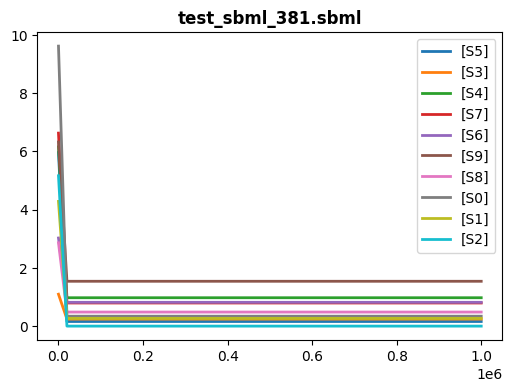

saved plot to ./10sp_10n_A/ss_figs/ss_420.png


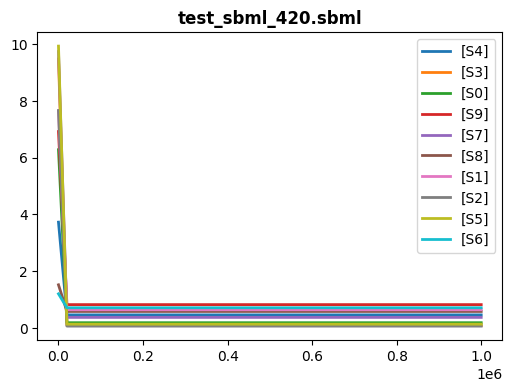

saved plot to ./10sp_10n_A/ss_figs/ss_457.png


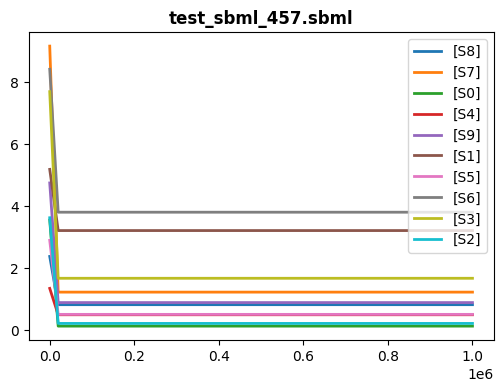

saved plot to ./10sp_10n_A/ss_figs/ss_461.png


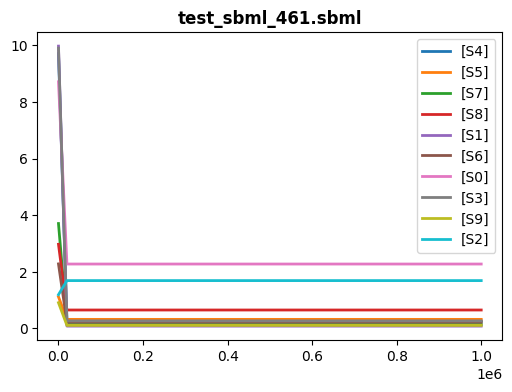

saved plot to ./10sp_10n_A/ss_figs/ss_485.png


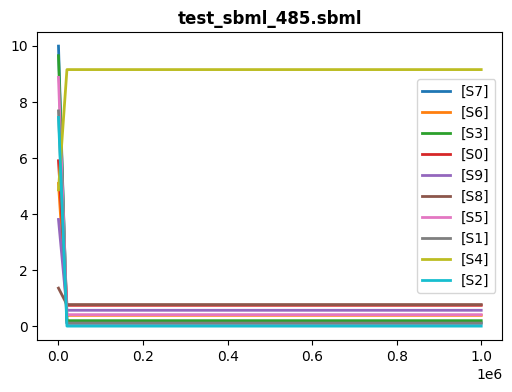

saved plot to ./10sp_10n_A/ss_figs/ss_6.png


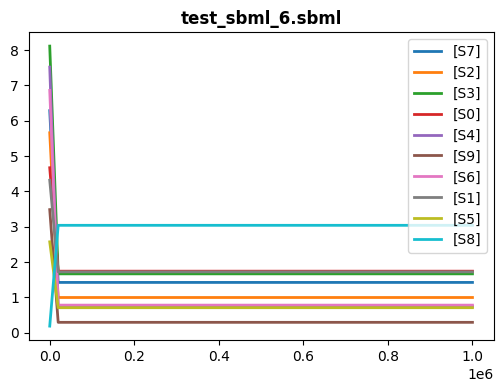

saved plot to ./10sp_10n_A/ss_figs/ss_70.png


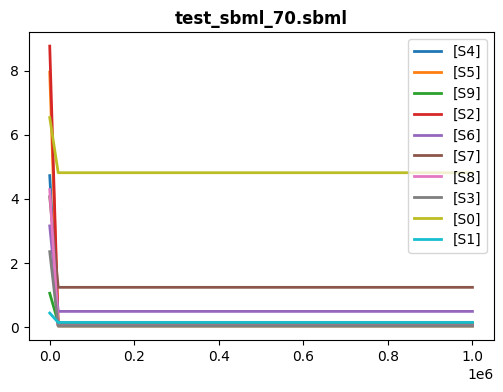

saved plot to ./10sp_10n_A/ss_figs/ss_75.png


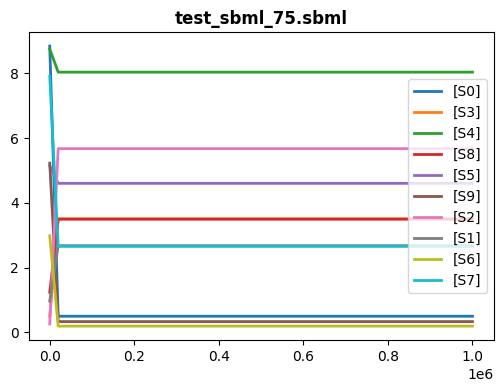

saved plot to ./10sp_10n_A/ss_figs/ss_88.png


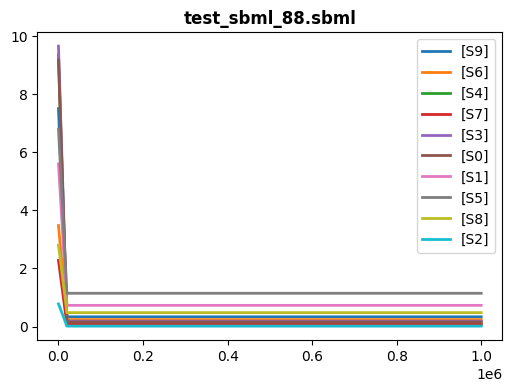

In [41]:
for i,file in enumerate(os.listdir('./'+ FOLDER_NAME + 'sbml/')):   
    r = te.loads(sbmlPath + file)
    r.reset()
    r.conservedMoietyAnalysis = True
    r.simulate(0,1000000)
    r.plot(title=file, savefig=ssPath+f'ss_{passlist[i]}.png')
